# 住宅価格

## 【問題1】データセットの取得

In [121]:
import numpy as np #行列
import pandas as pd #データ分析
import matplotlib.pyplot as plt
import seaborn as sns #matplotlibを使いやすくしたもの
%matplotlib inline

import pandas_profiling as pdp #pandas report

# pdp.ProfileReport(df)  #分析してくれる

import cv2

In [122]:
df=pd.read_csv('train.csv')

In [123]:
len(df)

1460

In [125]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [126]:
type(df)

pandas.core.frame.DataFrame

In [127]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題2】データセット自体の調査

Ames地区における家の価格と「様々な情報」（築年数、内装、プールの有無、場所、etc.）をまとめたデータ
n=1460, parameter数 = 81 
　
1460 rows × 81 columns  
 
「様々な情報」から価格を推定する

## 【問題3】データの確認

In [128]:
type(df) #Pandas形式

pandas.core.frame.DataFrame

1460 rows × 81 columns のデータ

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [130]:
# データ数、データ・タイプなどが表示されている

In [131]:
# 目的変数は最後の列にある

In [132]:
df.iloc[:, -1:].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [133]:
df.describe() #平均、標準偏差、四分位など

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [134]:
df.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [136]:
df.isnull().head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [137]:
df.sum()

Id                                                         1066530
MSSubClass                                                   83070
MSZoning         RLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRMRL...
LotFrontage                                                  84130
LotArea                                                   15354569
Street           PavePavePavePavePavePavePavePavePavePavePavePa...
LotShape         RegRegIR1IR1IR1IR1RegIR1RegRegRegIR1IR2IR1IR1R...
LandContour      LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...
Utilities        AllPubAllPubAllPubAllPubAllPubAllPubAllPubAllP...
LotConfig        InsideFR2InsideCornerFR2InsideInsideCornerInsi...
LandSlope        GtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlGtlG...
Neighborhood     CollgCrVeenkerCollgCrCrawforNoRidgeMitchelSome...
Condition1       NormFeedrNormNormNormNormNormPosNArteryArteryN...
Condition2       NormNormNormNormNormNormNormNormNormArteryNorm...
BldgType         1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam1Fam2fmCon1Fa

In [138]:
df.mean()

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

## 【問題4】欠損値への対応

In [139]:
#!pip install quilt

In [140]:
#!quilt install ResidentMario/missingno_data

In [141]:
from quilt.data.ResidentMario import missingno_data

In [142]:
collisions = missingno_data.nyc_collision_factors()

In [143]:
collisions = collisions.replace("nan", np.nan)

In [144]:
import missingno as msno

In [145]:
%matplotlib inline

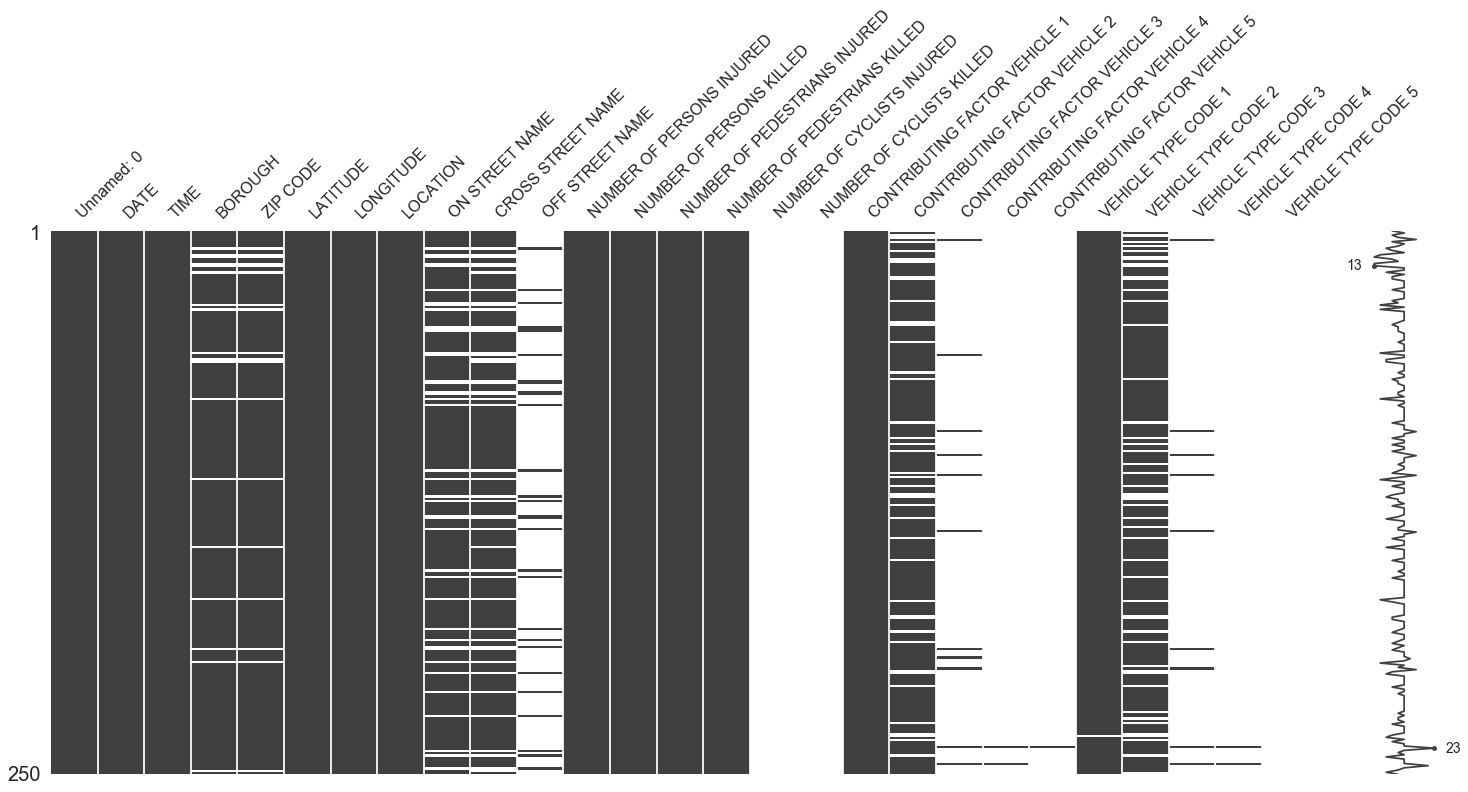

In [146]:
msno.matrix(collisions.sample(250))

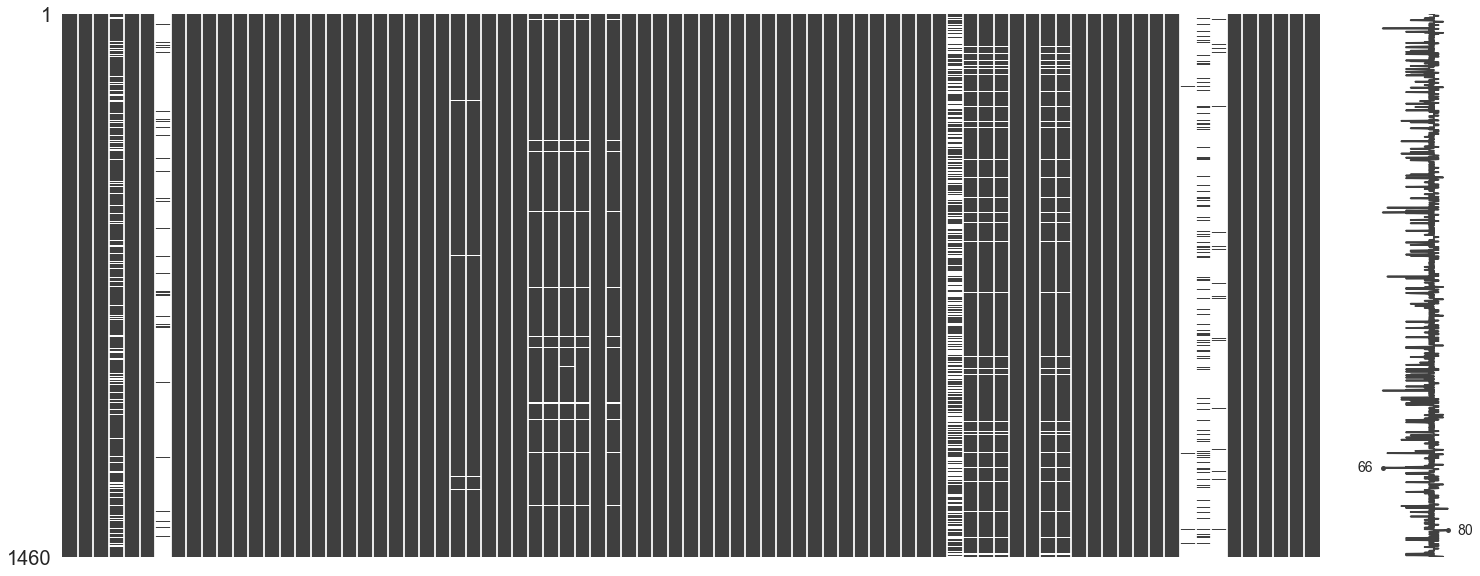

In [147]:
msno.matrix(df)

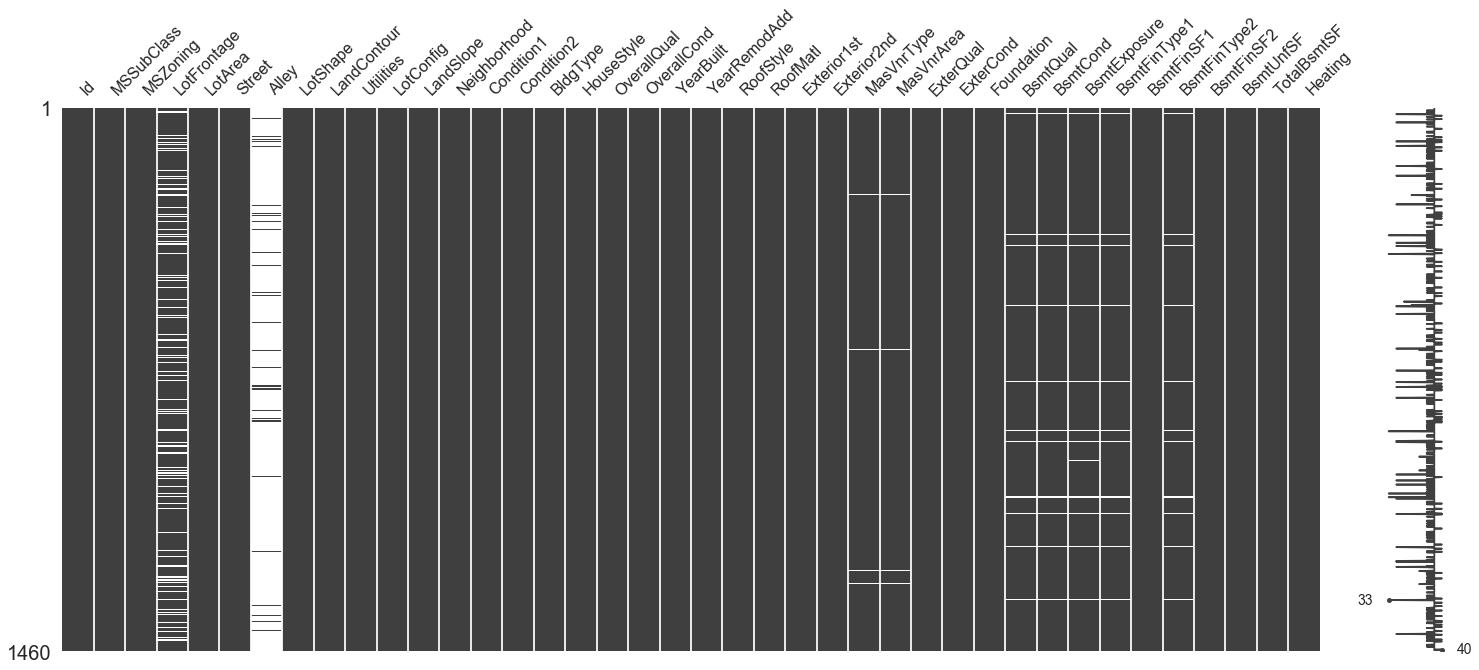

In [148]:
msno.matrix(df.iloc[:, :40])

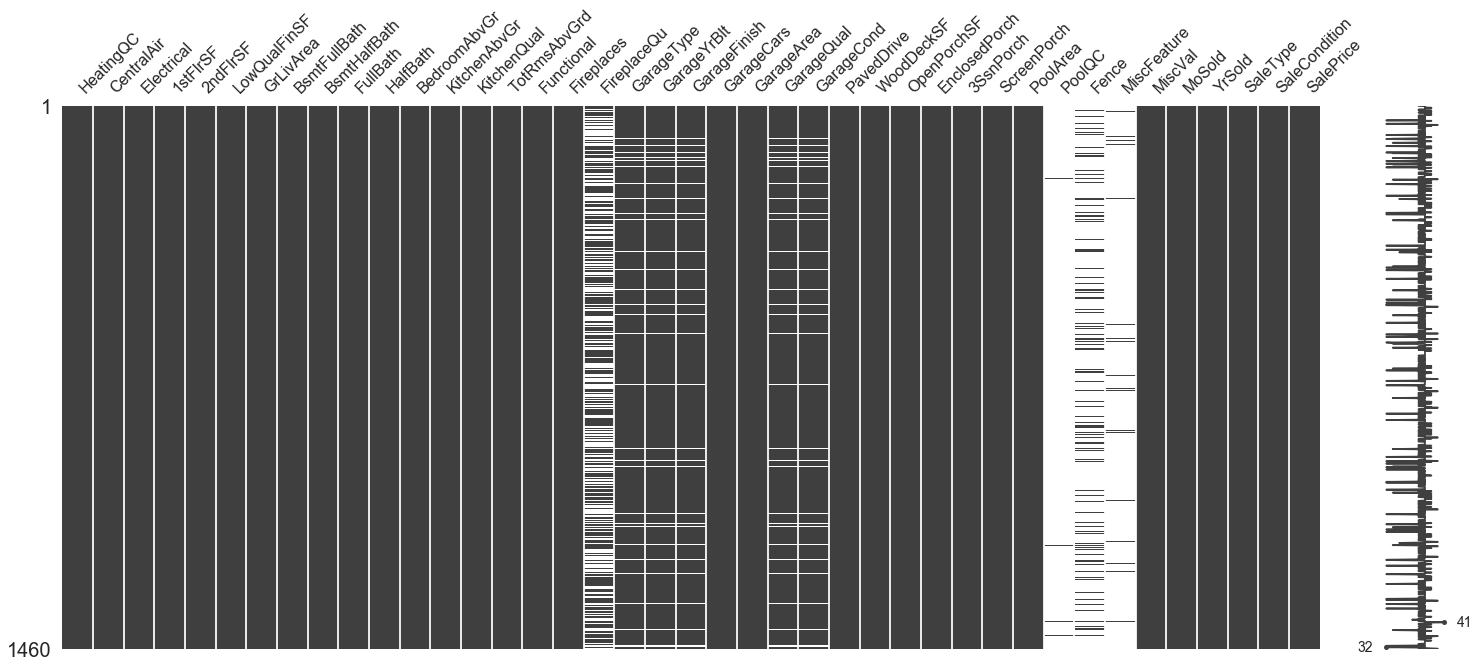

In [149]:
msno.matrix(df.iloc[:, 40:])

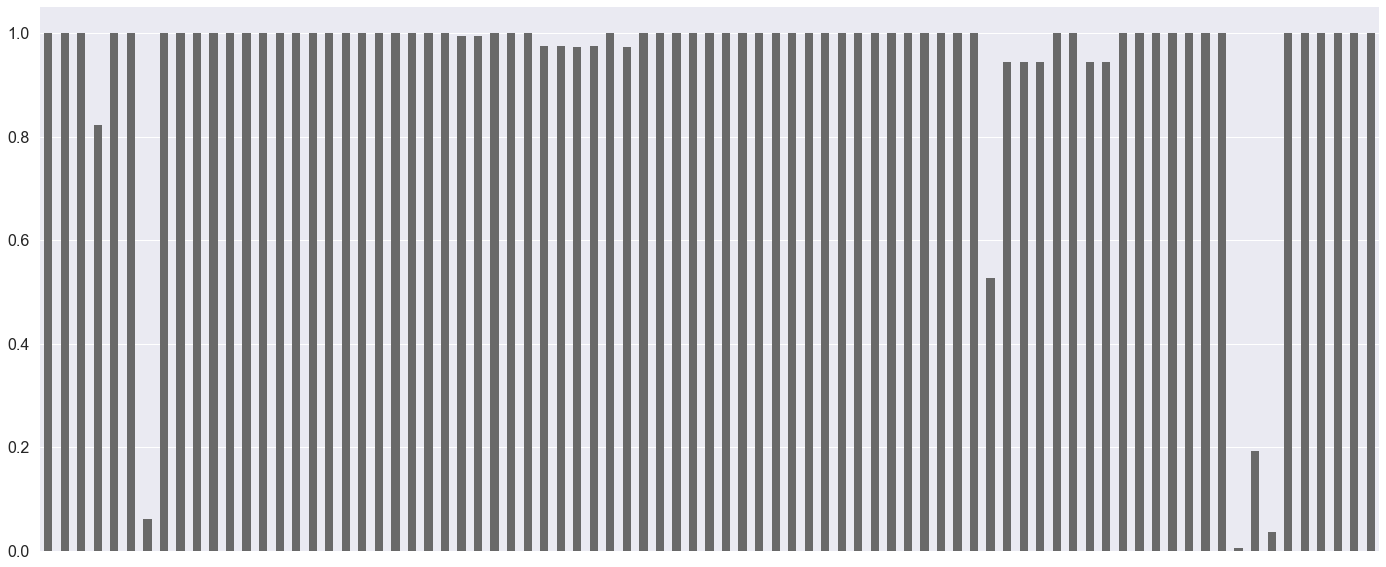

In [150]:
msno.bar(df)

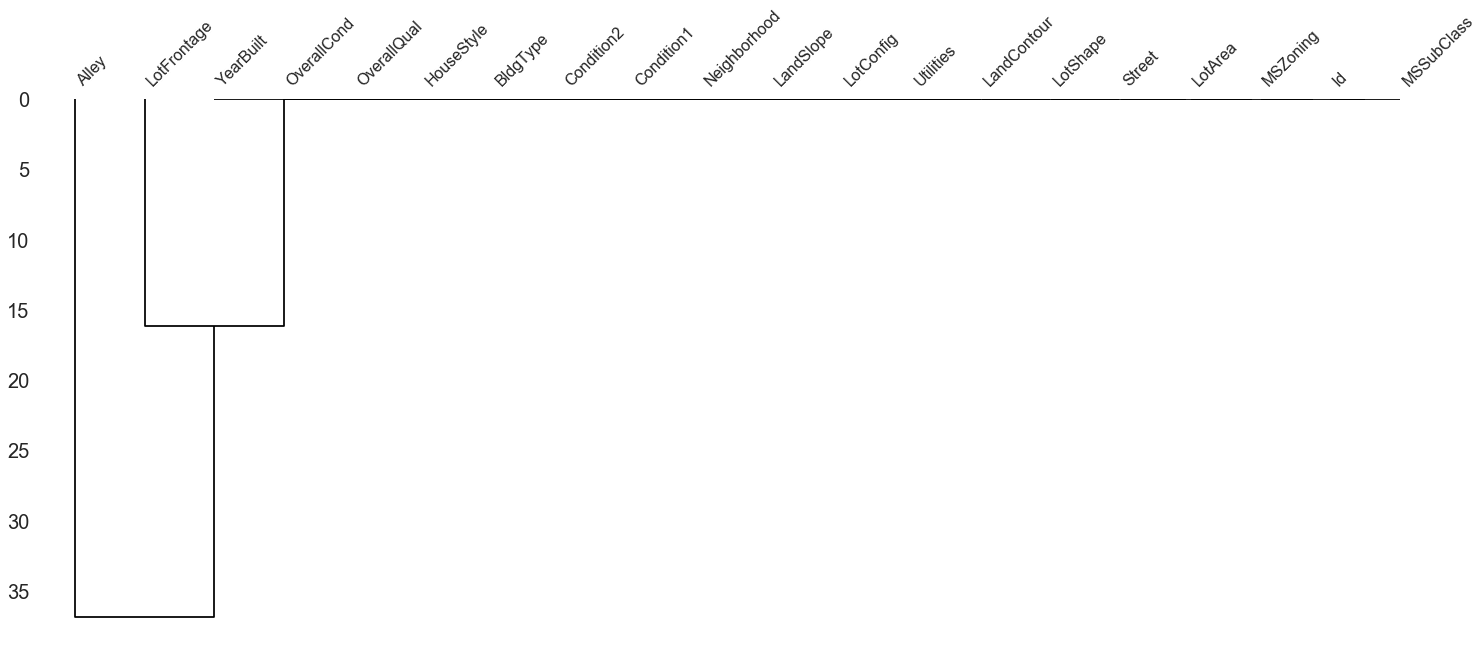

In [151]:
msno.dendrogram(df.iloc[:, :20])

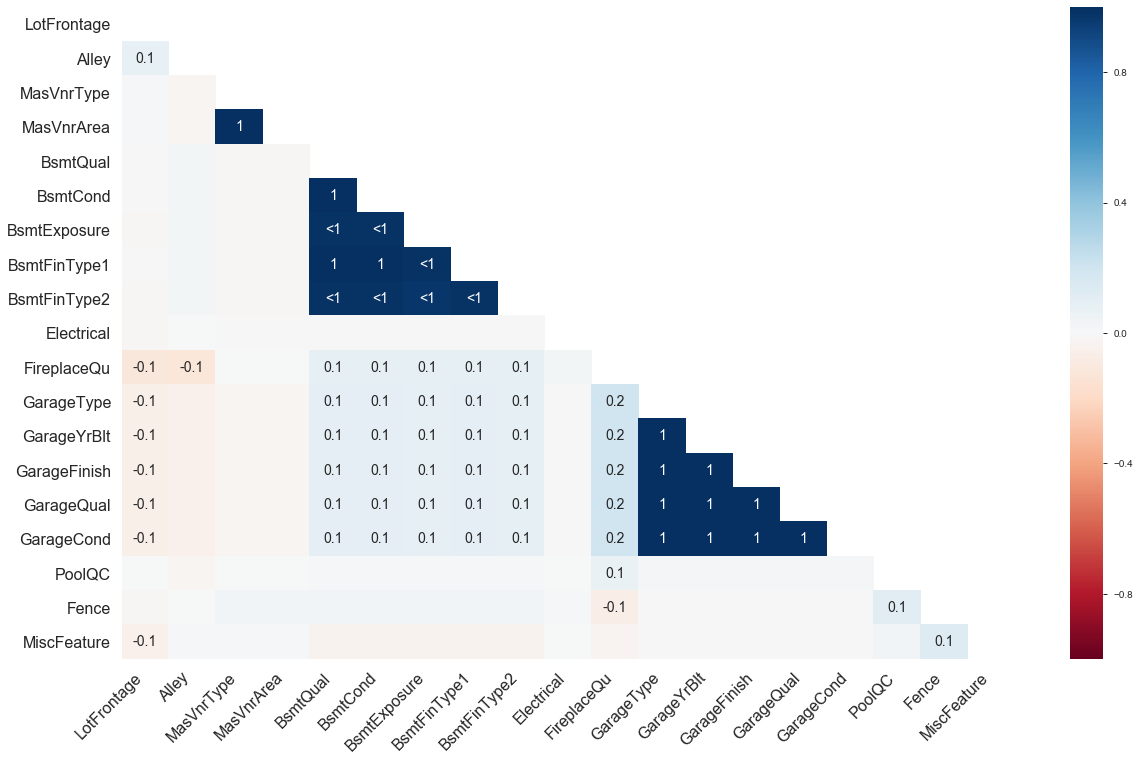

In [152]:
msno.heatmap(df)

In [153]:
df2=df.count() #+ df.isnull().sum()
df2.columns

AttributeError: 'Series' object has no attribute 'columns'

In [154]:
df3=pd.DataFrame({'ID':[], 'Total':[], 'Percentage':[]})

In [155]:
df3

,ID,Total,Percentage


In [156]:
df3['ID']=df.columns

In [157]:
df3.head()

,ID,Total,Percentage
0,Id,NaN,NaN
1,MSSubClass,NaN,NaN
2,MSZoning,NaN,NaN
3,LotFrontage,NaN,NaN
4,LotArea,NaN,NaN


In [158]:
df3['Total']=df.count()

In [159]:
df3.head()

,ID,Total,Percentage
0,Id,NaN,NaN
1,MSSubClass,NaN,NaN
2,MSZoning,NaN,NaN
3,LotFrontage,NaN,NaN
4,LotArea,NaN,NaN


In [160]:
df.count().iloc[6]

91

In [161]:
df_null_1=df.dropna() # 欠損値（NaN）があるレコード（行）を削除

In [162]:
df_null_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [163]:
#5つ以上欠損値がある特徴量（列）は削除
df_null_2=df.dropna(thresh =1460-5, axis ='columns')

In [164]:
df_null_2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [165]:
df_null_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [172]:
a=df.isnull().sum()
b=df.count()
c=a/1460*100
print(a, b, c)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [176]:
df_missing=pd.DataFrame({})
df_missing['Total']=df.count()

In [177]:
df_missing.head()

,Total
Id,1460
MSSubClass,1460
MSZoning,1460
LotFrontage,1201
LotArea,1460


In [178]:
df_missing['Percenrage']=df.isnull().sum()/1460*100

In [181]:
pd.options.display.float_format = '{:.1f}'.format


In [182]:
df_missing.head()

,Total,Percenrage
Id,1460,0.0
MSSubClass,1460,0.0
MSZoning,1460,0.0
LotFrontage,1201,17.7
LotArea,1460,0.0


In [183]:
df_missing

,Total,Percenrage
Id,1460,0.0
MSSubClass,1460,0.0
MSZoning,1460,0.0
LotFrontage,1201,17.7
LotArea,1460,0.0
Street,1460,0.0
Alley,91,93.8
LotShape,1460,0.0
LandContour,1460,0.0
Utilities,1460,0.0


## 問題5 用語の調査

尖度（せんど）
　分布の尖り具合，あるいは分布の裾の重さを表す指標　　
 
歪度（わいど）
　分布の歪み具合（どれくらい非対称なのか）

大雑把に言えば、尖っていると尖度が高く、左右非対称だと歪度が高い

In [185]:
df_number = df.select_dtypes(include='number')

In [186]:
df_number.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


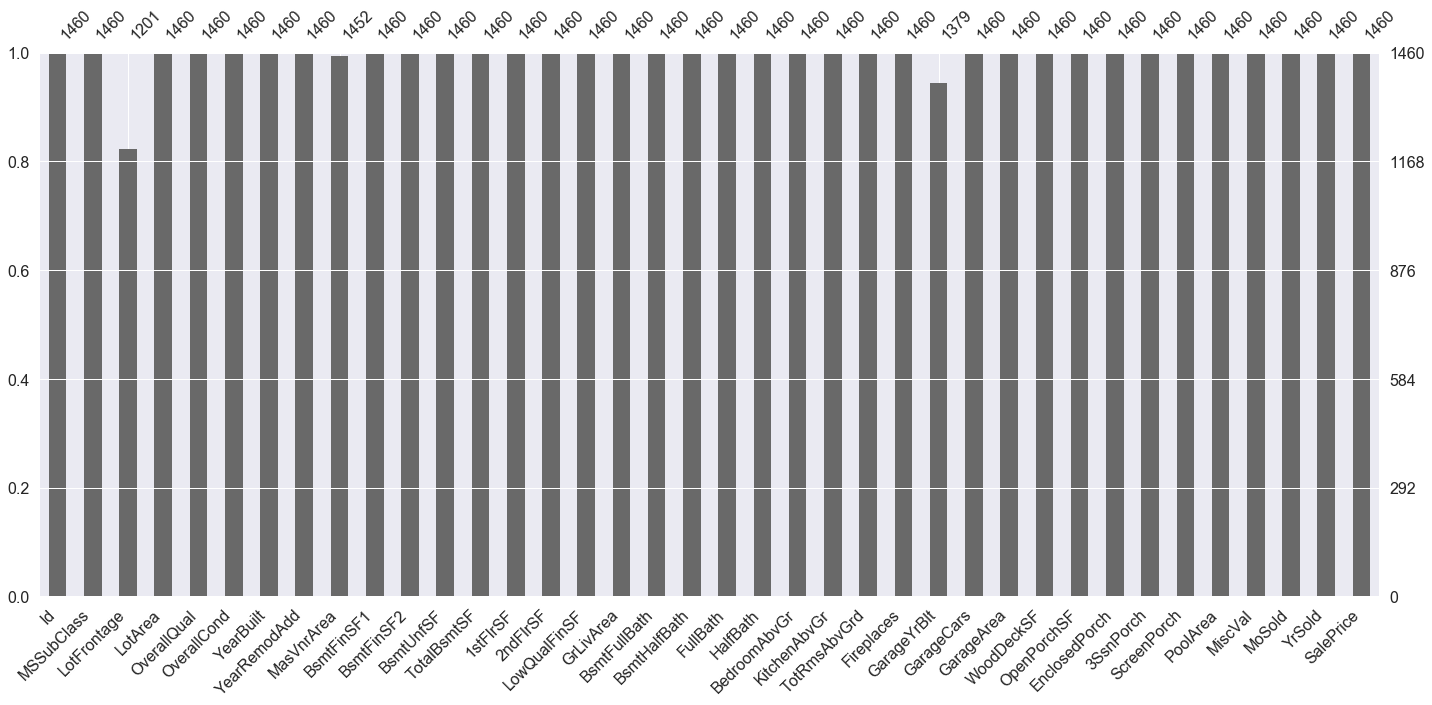

In [188]:
msno.bar(df_number)

In [190]:
df_number_1 = df_number.dropna()

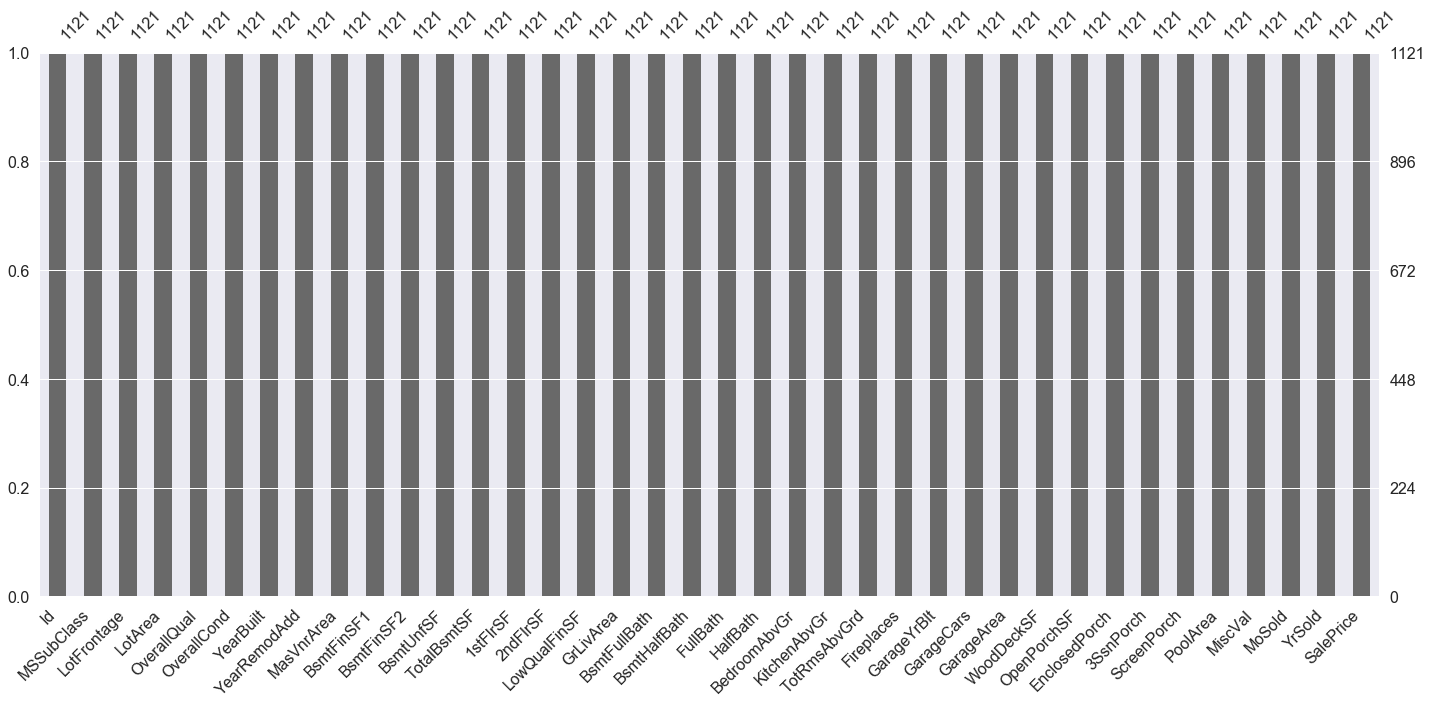

In [191]:
msno.bar(df_number_1)

In [218]:
def plot_dis(df_number, i=1):
    sns.distplot(df_number.iloc[:, i])
    print('尖度 {: .3f}'.format(df_number.iloc[:, i].skew()))
    print('歪度 {: .3f}'.format(df_number.iloc[:, i].kurt()))
    return

尖度  1.408
歪度  1.580


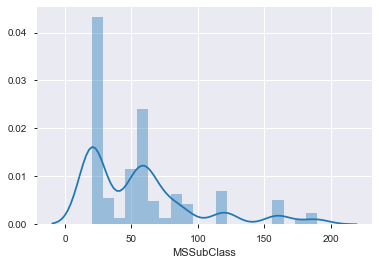

In [219]:
plot_dis(df_number, 1)

尖度  12.208
歪度  203.243


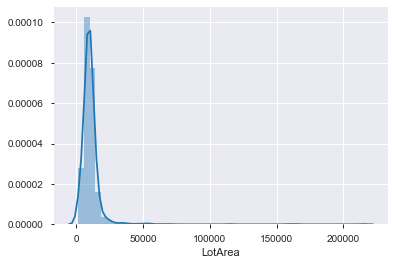

In [220]:
plot_dis(df_number, 3)

尖度  0.217
歪度  0.096


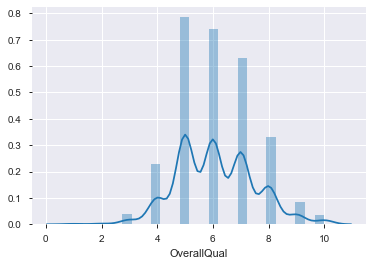

In [221]:
plot_dis(df_number, 4)

In [215]:
df_number_log=np.log(df_number_1)

/Users/ikono/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


尖度  0.248
歪度 -1.118


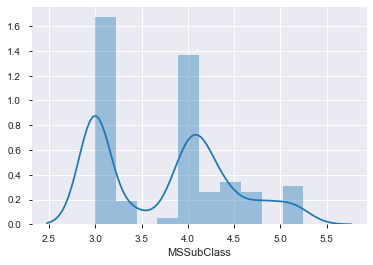

In [222]:
plot_dis(df_number_log, 1)

尖度 -0.746
歪度  2.436


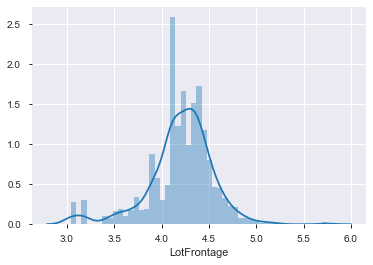

In [224]:
plot_dis(df_number_log, 2)

尖度 -0.483
歪度  4.503


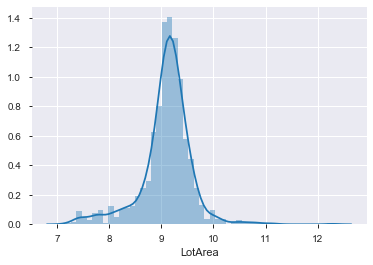

In [225]:
plot_dis(df_number_log, 3)

## 考察
logに変換することで、正規分布に近づく場合と、離れる場合がある。  
正規分布に近いほうが、予測精度が高まる

# 【問題7】相関係数の確認

In [229]:
pd.options.display.float_format = '{:.3f}'.format

In [230]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.011,-0.011,-0.033,-0.028,0.013,-0.013,-0.022,-0.050,-0.005,...,-0.030,-0.000,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022
MSSubClass,0.011,1.000,-0.386,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.011,-0.386,1.000,0.426,0.252,-0.059,0.123,0.089,0.193,0.234,...,0.089,0.152,0.011,0.070,0.041,0.206,0.003,0.011,0.007,0.352
LotArea,-0.033,-0.140,0.426,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264
OverallQual,-0.028,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791
OverallCond,0.013,-0.059,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,...,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078
YearBuilt,-0.013,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523
YearRemodAdd,-0.022,0.041,0.089,0.014,0.551,0.074,0.593,1.000,0.180,0.128,...,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507
MasVnrArea,-0.050,0.023,0.193,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,...,0.160,0.126,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.477
BsmtFinSF1,-0.005,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386


In [231]:
df4=df_number.corr()

In [232]:
df4

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.011,-0.011,-0.033,-0.028,0.013,-0.013,-0.022,-0.050,-0.005,...,-0.030,-0.000,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022
MSSubClass,0.011,1.000,-0.386,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.011,-0.386,1.000,0.426,0.252,-0.059,0.123,0.089,0.193,0.234,...,0.089,0.152,0.011,0.070,0.041,0.206,0.003,0.011,0.007,0.352
LotArea,-0.033,-0.140,0.426,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264
OverallQual,-0.028,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791
OverallCond,0.013,-0.059,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,...,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078
YearBuilt,-0.013,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523
YearRemodAdd,-0.022,0.041,0.089,0.014,0.551,0.074,0.593,1.000,0.180,0.128,...,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507
MasVnrArea,-0.050,0.023,0.193,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,...,0.160,0.126,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.477
BsmtFinSF1,-0.005,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386


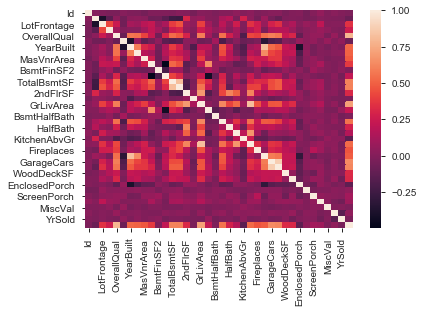

In [234]:
sns.heatmap(df_number.corr())

In [235]:
df_corr=df_number.corr()

In [237]:
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.011,-0.011,-0.033,-0.028,0.013,-0.013,-0.022,-0.050,-0.005,...,-0.030,-0.000,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022
MSSubClass,0.011,1.000,-0.386,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.011,-0.386,1.000,0.426,0.252,-0.059,0.123,0.089,0.193,0.234,...,0.089,0.152,0.011,0.070,0.041,0.206,0.003,0.011,0.007,0.352
LotArea,-0.033,-0.140,0.426,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264
OverallQual,-0.028,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791
OverallCond,0.013,-0.059,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,...,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078
YearBuilt,-0.013,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523
YearRemodAdd,-0.022,0.041,0.089,0.014,0.551,0.074,0.593,1.000,0.180,0.128,...,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507
MasVnrArea,-0.050,0.023,0.193,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,...,0.160,0.126,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.477
BsmtFinSF1,-0.005,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386


In [240]:
df_corr.loc['SalePrice']

Id              -0.022
MSSubClass      -0.084
LotFrontage      0.352
LotArea          0.264
OverallQual      0.791
OverallCond     -0.078
YearBuilt        0.523
YearRemodAdd     0.507
MasVnrArea       0.477
BsmtFinSF1       0.386
BsmtFinSF2      -0.011
BsmtUnfSF        0.214
TotalBsmtSF      0.614
1stFlrSF         0.606
2ndFlrSF         0.319
LowQualFinSF    -0.026
GrLivArea        0.709
BsmtFullBath     0.227
BsmtHalfBath    -0.017
FullBath         0.561
HalfBath         0.284
BedroomAbvGr     0.168
KitchenAbvGr    -0.136
TotRmsAbvGrd     0.534
Fireplaces       0.467
GarageYrBlt      0.486
GarageCars       0.640
GarageArea       0.623
WoodDeckSF       0.324
OpenPorchSF      0.316
EnclosedPorch   -0.129
3SsnPorch        0.045
ScreenPorch      0.111
PoolArea         0.092
MiscVal         -0.021
MoSold           0.046
YrSold          -0.029
SalePrice        1.000
Name: SalePrice, dtype: float64

In [244]:
df_corr.loc['SalePrice'].sort_values()

KitchenAbvGr    -0.136
EnclosedPorch   -0.129
MSSubClass      -0.084
OverallCond     -0.078
YrSold          -0.029
LowQualFinSF    -0.026
Id              -0.022
MiscVal         -0.021
BsmtHalfBath    -0.017
BsmtFinSF2      -0.011
3SsnPorch        0.045
MoSold           0.046
PoolArea         0.092
ScreenPorch      0.111
BedroomAbvGr     0.168
BsmtUnfSF        0.214
BsmtFullBath     0.227
LotArea          0.264
HalfBath         0.284
OpenPorchSF      0.316
2ndFlrSF         0.319
WoodDeckSF       0.324
LotFrontage      0.352
BsmtFinSF1       0.386
Fireplaces       0.467
MasVnrArea       0.477
GarageYrBlt      0.486
YearRemodAdd     0.507
YearBuilt        0.523
TotRmsAbvGrd     0.534
FullBath         0.561
1stFlrSF         0.606
TotalBsmtSF      0.614
GarageArea       0.623
GarageCars       0.640
GrLivArea        0.709
OverallQual      0.791
SalePrice        1.000
Name: SalePrice, dtype: float64

In [246]:
df_corr.loc['SalePrice'].sort_values()[-11: -1]

YearRemodAdd   0.507
YearBuilt      0.523
TotRmsAbvGrd   0.534
FullBath       0.561
1stFlrSF       0.606
TotalBsmtSF    0.614
GarageArea     0.623
GarageCars     0.640
GrLivArea      0.709
OverallQual    0.791
Name: SalePrice, dtype: float64

In [270]:
d=df_corr.loc['SalePrice'].sort_values()[-11: ]
d.index

Index(['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF',
       'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual',
       'SalePrice'],
      dtype='object')

In [271]:
top_list=d.index

In [272]:
top_list=list(top_list)

In [273]:
top_list

['YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

In [278]:
df_number.loc[: , top_list].head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000


In [279]:
df_top=df_number.ix[: , top_list]

/Users/ikono/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [280]:
df_top.corr()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
YearRemodAdd,1.000,0.593,0.192,0.439,0.240,0.291,0.372,0.421,0.287,0.551,0.507
YearBuilt,0.593,1.000,0.096,0.468,0.282,0.391,0.479,0.538,0.199,0.572,0.523
TotRmsAbvGrd,0.192,0.096,1.000,0.555,0.410,0.286,0.338,0.362,0.825,0.427,0.534
FullBath,0.439,0.468,0.555,1.000,0.381,0.324,0.406,0.470,0.630,0.551,0.561
1stFlrSF,0.240,0.282,0.410,0.381,1.000,0.820,0.490,0.439,0.566,0.476,0.606
TotalBsmtSF,0.291,0.391,0.286,0.324,0.820,1.000,0.487,0.435,0.455,0.538,0.614
GarageArea,0.372,0.479,0.338,0.406,0.490,0.487,1.000,0.882,0.469,0.562,0.623
GarageCars,0.421,0.538,0.362,0.470,0.439,0.435,0.882,1.000,0.467,0.601,0.640
GrLivArea,0.287,0.199,0.825,0.630,0.566,0.455,0.469,0.467,1.000,0.593,0.709
OverallQual,0.551,0.572,0.427,0.551,0.476,0.538,0.562,0.601,0.593,1.000,0.791


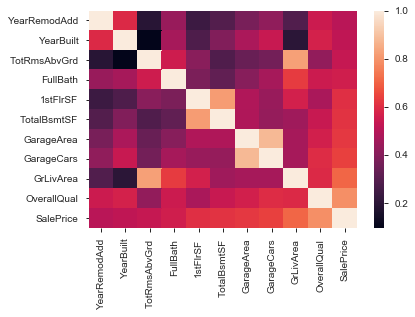

In [281]:
sns.heatmap(df_top.corr())

'YearRemodAdd' Remodel date (same as construction date if no remodeling or additions)  
 'YearBuilt'  Original construction date  
 'TotRmsAbvGrd' Total rooms above grade (does not include bathrooms)  
 'FullBath'  Full bathrooms above grade  
 '1stFlrSF' First Floor square feet  
 'TotalBsmtSF' Total square feet of basement area  
 'GarageArea'  Size of garage in square feet  
 'GarageCars'  Size of garage in car capacity  
 'GrLivArea'  Above grade (ground) living area square feet  
 'OverallQual' Overall material and finish quality

In [282]:
e=df_corr.loc['SalePrice'].sort_values()[-11: -1]

In [286]:
e

YearRemodAdd   0.507
YearBuilt      0.523
TotRmsAbvGrd   0.534
FullBath       0.561
1stFlrSF       0.606
TotalBsmtSF    0.614
GarageArea     0.623
GarageCars     0.640
GrLivArea      0.709
OverallQual    0.791
Name: SalePrice, dtype: float64

In [287]:
df_number.loc[: , e.index].head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,2003,2003,8,2,856,856,548,2,1710,7
1,1976,1976,6,2,1262,1262,460,2,1262,6
2,2002,2001,6,2,920,920,608,2,1786,7
3,1970,1915,7,1,961,756,642,3,1717,7
4,2000,2000,9,2,1145,1145,836,3,2198,8


In [288]:
df_number.loc[: , e.index].head().corr()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
YearRemodAdd,1.000,0.886,0.420,0.711,-0.401,-0.012,0.325,-0.299,0.564,0.534
YearBuilt,0.886,1.000,0.241,0.956,-0.018,0.403,0.077,-0.524,0.258,0.227
TotRmsAbvGrd,0.420,0.241,1.000,0.086,-0.074,-0.022,0.732,0.560,0.764,0.813
FullBath,0.711,0.956,0.086,1.000,0.224,0.618,-0.093,-0.612,0.030,0.000
1stFlrSF,-0.401,-0.018,-0.074,0.224,1.000,0.905,0.000,0.131,-0.252,-0.245
TotalBsmtSF,-0.012,0.403,-0.022,0.618,0.905,1.000,-0.040,-0.163,-0.190,-0.197
GarageArea,0.325,0.077,0.732,-0.093,0.000,-0.040,1.000,0.785,0.950,0.952
GarageCars,-0.299,-0.524,0.560,-0.612,0.131,-0.163,0.785,1.000,0.612,0.645
GrLivArea,0.564,0.258,0.764,0.030,-0.252,-0.190,0.950,0.612,1.000,0.996
OverallQual,0.534,0.227,0.813,0.000,-0.245,-0.197,0.952,0.645,0.996,1.000


In [290]:
df_number.loc[: , e.index].head().corr().sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

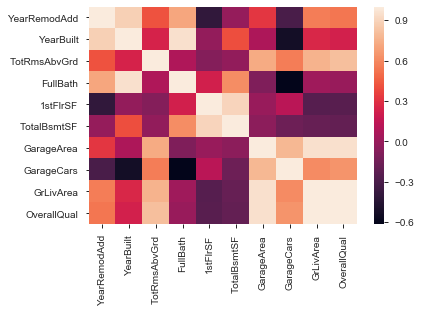

In [291]:
sns.heatmap(df_number.loc[: , e.index].head().corr())

OverallQual - GrLiveArea 0.996  
YearBulit - FullBath 0.956  
GarageArea - OverallQual 0.952
